In [1]:
import numpy as np
np.set_printoptions(precision=4)

Initializing camera:

In [2]:
import pyavfcam
# Open the default video source
cam = pyavfcam.AVFCam(sinks='image')
print( "Size: " + str(cam.shape[0]) + " x " + str(cam.shape[1]) )

Size: 720 x 1280


Snap a picture:

In [3]:
frame = np.asarray(cam.snap_picture())
print('frame as size', frame.shape)

frame as size (720, 1280)


Exception ignored in: 'pyavfcam.cy_call_func'
TypeError: attribute name must be string, not 'bytes'


Accessing a pixel:

In [4]:
frame[0, 0]

(117, 102, 115, 255)

Accessing a line:

In [5]:
frame[0, :]

array([(117, 102, 115, 255), (117, 102, 115, 255), (117, 102, 115, 255),
       ..., ( 94,  75,  77, 255), ( 77,  63,  64, 255),
       ( 62,  48,  49, 255)],
      dtype=[('f0', 'u1'), ('f1', 'u1'), ('f2', 'u1'), ('f3', 'u1')])

In [6]:
dtype = [('f0', np.uint8), ('f1', np.uint8), ('f2', np.uint8), ('f3', np.uint8)]
frame[:, 0].view(dtype=dtype)

array([(117, 102, 115, 255), (117, 102, 115, 255), (115, 101, 114, 255),
       (119, 102, 115, 255), (121, 102, 115, 255), (121, 102, 115, 255),
       (120, 103, 116, 255), (117, 103, 113, 255), (113, 101, 114, 255),
       (114, 103, 113, 255), (113, 103, 108, 255), (117, 104, 108, 255),
       (115, 103, 107, 255), (117, 103, 111, 255), (117, 103, 113, 255),
       (117, 102, 115, 255), (114,  95, 106, 255), (121, 102, 113, 255),
       (119, 103, 113, 255), (115, 100, 108, 255), (115,  98, 104, 255),
       (116,  99, 103, 255), (117,  98, 102, 255), (117, 100, 104, 255),
       (116,  99, 103, 255), (114,  99, 105, 255), (112,  96, 104, 255),
       (110,  95, 108, 255), (106,  91, 106, 255), (103,  88, 101, 255),
       (104,  91,  99, 255), (104,  92,  95, 255), (106,  90, 100, 255),
       (105,  89,  99, 255), ( 99,  85,  97, 255), (100,  85, 100, 255),
       ( 97,  81,  99, 255), ( 96,  80,  99, 255), ( 92,  76,  96, 255),
       ( 95,  77,  97, 255), ( 86,  75,  85, 255), 

getting prepared for reshaping:

In [7]:
frame[0, :].shape[0] * 4, frame[0, :].view(dtype=dtype).view(dtype=np.uint8).shape

(5120, (5120,))

In [8]:
frame.ravel().shape[0] * 4, frame.ravel().view(dtype=dtype).view(dtype=np.uint8).shape

(3686400, (3686400,))

In [9]:
frame_np = frame.view(dtype=dtype).view(dtype=np.uint8) # convert to UINT8
frame_np = frame_np.reshape((cam.shape[0], cam.shape[1], 4)) # de-raveling
frame_np = frame_np[:, :, :3] # removing alpha
frame_np = frame_np[:, :, ::-1] # BGR > RGB
print('frame_np as size', frame_np.shape)
print ('Min, max=', frame_np.min(), frame_np.max())

frame_np as size (720, 1280, 3)
Min, max= 0 207


and finally displaying it

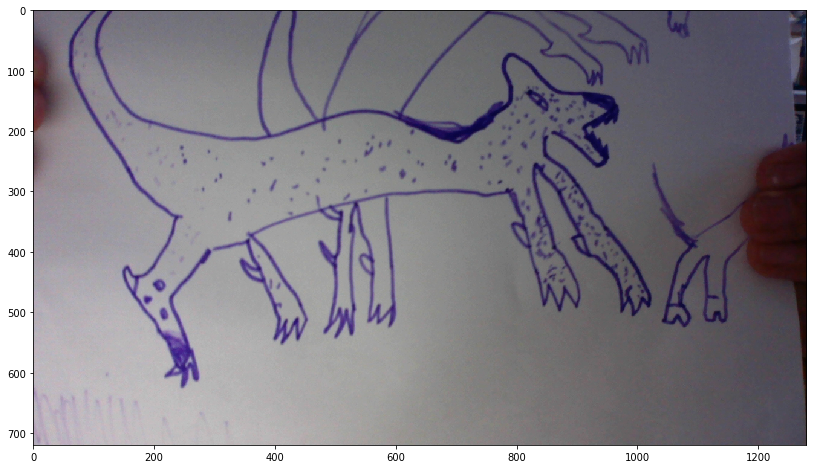

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(frame_np/255.)